# Telecom Churn Prediction

## Phase 1 : Data Cleaning and EDA

### Step 1 : Data Loading and Basic Preprocessing

In [2]:
# Import necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler, LabelEncoder

Comment :
Data manipulation: Using Pandas and NumPy.
, Data visualization: Using Seaborn and Matplotlib.
, Data preprocessing: Using Scikit-learn's StandardScaler and LabelEncoder.

In [3]:
# Load the dataset
churn_data = pd.read_csv('/Users/abhi./Desktop/churn_data/Churn_ Data.csv', low_memory=False)

Comment : This line of code uses the `pandas` library to load a CSV file containing the telecom churn data into a DataFrame.

In [4]:
# Shape of the data
print("Shape of the data:", churn_data.shape)

Shape of the data: (25000, 111)


In [5]:
# Checking the datatype
print("Data types:")
print(churn_data.dtypes.value_counts())

Data types:
float64    80
int64      31
dtype: int64


In [6]:
# Checking the Statistical summary.
print("Statistical summary:")
print(churn_data.describe())

Statistical summary:
       s6.new.rev.p2.m2  s1.new.rev.m1  s3.og.rev.4db.p5  s3.new.rev.4db.p5  \
count      25000.000000   25000.000000      25000.000000       25000.000000   
mean          -0.003730     281.073083          4.890003           7.070194   
std            2.727916     276.075983          4.212452           6.318992   
min           -1.000000       0.000000          0.000000           0.000833   
25%           -0.580000     101.563800          2.367288           3.318825   
50%           -0.170000     204.859600          3.729944           5.231268   
75%            0.280000     370.711650          5.993342           8.395736   
max          316.860000    5702.924300        153.221695         170.200441   

       s4.usg.ins.p2  s4.og.unq.any.p2  s2.rch.val.p6  s1.og.rev.all.m1  \
count   25000.000000      25000.000000   25000.000000      25000.000000   
mean        5.460080         28.532520      72.208906        218.517937   
std         2.184444         28.061435    

 Comment : Count: Number of non-null entries for each column.
  , Mean: Average value of numerical columns.
  , Standard Deviation (std): Measure of the spread of the values.
  , Min/Max: Minimum and maximum values in each numerical column.
  , 25%, 50%, 75% Percentiles: Values at these percentiles (useful for understanding the distribution).


In [7]:
# Display the first few rows of the dataset
print("First few rows of the dataset:")
display(churn_data.head())

First few rows of the dataset:


s6.new.rev.p2.m2  s1.new.rev.m1  s3.og.rev.4db.p5  s3.new.rev.4db.p5  \
0             -0.76        88.0482          3.106604           3.754955   
1             -0.98        67.5039          3.094574           5.550865   
2             -0.98        33.9248          2.324016           2.438114   
3             -0.92        82.6780          2.630749           2.858961   
4             -0.97        96.8379          2.674316           2.912397   

   s4.usg.ins.p2  s4.og.unq.any.p2  s2.rch.val.p6  s1.og.rev.all.m1  \
0              4                14          39.29            57.320   
1              1                 2          21.67            38.700   
2              2                 3          30.00            15.320   
3              2                 3          50.00            51.956   
4              3                 2          22.50            66.886   

   s8.new.rev.p6  s4.loc.ic.ins.p1  ...  prop.og.mou.tot.mou.all.p6  \
0          -0.17                 1  ...                    0.454642   
1          -0.32                 3  ...                    0.343190   
2          -0.05                 3  ...                    0.101838   
3          -0.18                 4  ...                    0.066602   
4           0.01                 4  ...                    0.219821   

   prop.i2i.og.mou.p6  s4.loc.ic.ins.p2  s4.std.ic.ins.l14  \
0            0.497397                 4                  0   
1            0.767617                 6                  0   
2            0.619034                 6                  1   
3            0.437088                 7                  2   
4            0.585977                 6                  1   

   s4.low.blnc.ins.p4  s3.og.rev.all.m2  s3.new.rev.m2  prop.og.mou.any.p6  \
0                   9              6.02           8.20           46.465636   
1                  20              3.66           8.10           34.525456   
2                  19              4.33           4.36           10.298451   
3                  11              3.40           3.53            6.670783   
4                  14              3.85           3.87           21.998905   

   prop.loc.i2i.mou.og.mou.p3  s3.rev.p1  
0                    0.609456       0.22  
1                    1.000000       0.38  
2                    0.699592       0.11  
3                    0.086617       5.18  
4                    0.683105       0.10  

[5 rows x 111 columns]

Comment : Shows the first few rows of the dataset to get an initial idea of what the data looks like.


In [8]:
# Display the last few rows of the dataset
print("Last few rows of the dataset:")
display(churn_data.tail())

Last few rows of the dataset:


s6.new.rev.p2.m2  s1.new.rev.m1  s3.og.rev.4db.p5  s3.new.rev.4db.p5  \
24995              0.21       132.0365          2.652236           2.857739   
24996              0.80        77.0154          3.763389           5.012503   
24997              0.01       148.8337          3.823940           4.334250   
24998              0.17      1012.4398         14.667580          14.579567   
24999             -1.00       275.3530          5.134579           5.954062   

       s4.usg.ins.p2  s4.og.unq.any.p2  s2.rch.val.p6  s1.og.rev.all.m1  \
24995              5                 8          26.67           123.396   
24996              2                 8          27.88            62.140   
24997              6                10          10.00            98.900   
24998              7                67          42.92           734.005   
24999              1                 1          53.50           250.340   

       s8.new.rev.p6  s4.loc.ic.ins.p1  ...  prop.og.mou.tot.mou.all.p6  \
24995          -0.16                 4  ...                    0.145831   
24996           0.19                 4  ...                    0.529829   
24997          -0.03                 2  ...                    0.327245   
24998           0.70                 4  ...                    0.824671   
24999          -0.48                 4  ...                    0.377281   

       prop.i2i.og.mou.p6  s4.loc.ic.ins.p2  s4.std.ic.ins.l14  \
24995            0.200151                 7                  0   
24996            0.169835                 7                  0   
24997            0.407944                 3                  0   
24998            0.889239                 7                  1   
24999            0.609046                 7                  0   

       s4.low.blnc.ins.p4  s3.og.rev.all.m2  s3.new.rev.m2  \
24995                  18              3.57           3.83   
24996                  18              6.89           7.70   
24997                  12              6.63           7.48   
24998                   1             19.36          22.26   
24999                  18              5.42           8.02   

       prop.og.mou.any.p6  prop.loc.i2i.mou.og.mou.p3  s3.rev.p1  
24995           14.896154                    0.328027       0.76  
24996           55.156230                    0.288006      12.74  
24997           33.222018                    0.235918       8.07  
24998           82.549378                    0.952962      21.21  
24999           38.590040                    1.000000       0.00  

[5 rows x 111 columns]

Comment : Shows the last few rows of the dataset.

In [9]:
# Display basic information about the dataset
print("Dataset information:")
churn_data.info()


Dataset information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25000 entries, 0 to 24999
Columns: 111 entries, s6.new.rev.p2.m2 to s3.rev.p1
dtypes: float64(80), int64(31)
memory usage: 21.2 MB


Comment : Provides a concise summary of the DataFrame.
- Output:
, Class type: DataFrame.
, RangeIndex: The number of rows.
, Columns: List of columns, their data types, and non-null counts.
, Memory usage: Approximate memory usage of the DataFrame.

### Step 2 : Data Cleaning and Exploratory Data Analysis

In [10]:
# Remove duplicate records
churn_data.drop_duplicates(inplace=True)
print("Number of records after removing duplicates:", churn_data.shape[0])

Number of records after removing duplicates: 25000


Comment : This step is crucial in data preprocessing as duplicates can lead to misleading analysis and can negatively affect the performance of machine learning models.


In [11]:
# Remove columns with a single unique value
nunique_cols = churn_data.nunique()
cols_to_drop = nunique_cols[nunique_cols == 1].index
churn_data.drop(cols_to_drop, axis=1, inplace=True)
print("Number of columns after removing single unique value columns:", churn_data.shape[1])

Number of columns after removing single unique value columns: 111


Comment : This step ensures that only informative and variable features are retained. Columns with a single unique value do not help in distinguishing between different classes and thus are redundant.

This step is important in data preprocessing as it helps in reducing the dimensionality of the dataset, making it more manageable and improving the efficiency of the machine learning algorithms.


In [12]:
# Remove zero variance variables (considering only numerical columns)
numerical_cols = churn_data.select_dtypes(include=[np.number]).columns
zero_var_cols = churn_data[numerical_cols].var()[churn_data[numerical_cols].var() == 0].index
churn_data.drop(zero_var_cols, axis=1, inplace=True)
print("Number of columns after removing zero variance variables:", churn_data.shape[1])

Number of columns after removing zero variance variables: 111


Comment : This step ensures that only informative and variable features are retained. Zero variance columns do not help in distinguishing between different classes and thus are redundant.


In [13]:
# Handling missing values
print("Missing values in the dataset:")
print(churn_data.isnull().sum())

Missing values in the dataset:
s6.new.rev.p2.m2              0
s1.new.rev.m1                 0
s3.og.rev.4db.p5              0
s3.new.rev.4db.p5             0
s4.usg.ins.p2                 0
                             ..
s3.og.rev.all.m2              0
s3.new.rev.m2                 0
prop.og.mou.any.p6            0
prop.loc.i2i.mou.og.mou.p3    0
s3.rev.p1                     0
Length: 111, dtype: int64


Comment : To check and display the number of missing values in each column of the DataFrame.


In [14]:
# Fill missing values with the mean for numerical columns and the mode for categorical columns
for column in churn_data.columns:
    if churn_data[column].dtype == 'object':
        churn_data[column].fillna(churn_data[column].mode()[0], inplace=True)
    else:
        churn_data[column].fillna(churn_data[column].mean(), inplace=True)

Comment : To fill in missing values with appropriate statistics based on the data type of the column.

In [15]:
# Verify that there are no missing values
print("Missing values after imputation:")
print(churn_data.isnull().sum())

Missing values after imputation:
s6.new.rev.p2.m2              0
s1.new.rev.m1                 0
s3.og.rev.4db.p5              0
s3.new.rev.4db.p5             0
s4.usg.ins.p2                 0
                             ..
s3.og.rev.all.m2              0
s3.new.rev.m2                 0
prop.og.mou.any.p6            0
prop.loc.i2i.mou.og.mou.p3    0
s3.rev.p1                     0
Length: 111, dtype: int64


Comment : Handling missing values is an essential part of data preprocessing as missing values can disrupt analysis and model performance. Proper imputation helps in maintaining data integrity and improving model accuracy.


In [16]:
# Encode categorical variables
label_encoders = {}
for column in churn_data.select_dtypes(include=['object']).columns:
    le = LabelEncoder()
    churn_data[column] = le.fit_transform(churn_data[column])
    label_encoders[column] = le

Comment : To convert categorical variables into numerical format using Label Encoding(Converts categorical data into numerical form, which is required for many machine learning algorithms that cannot handle categorical data directly.


#### Outlier Treatment

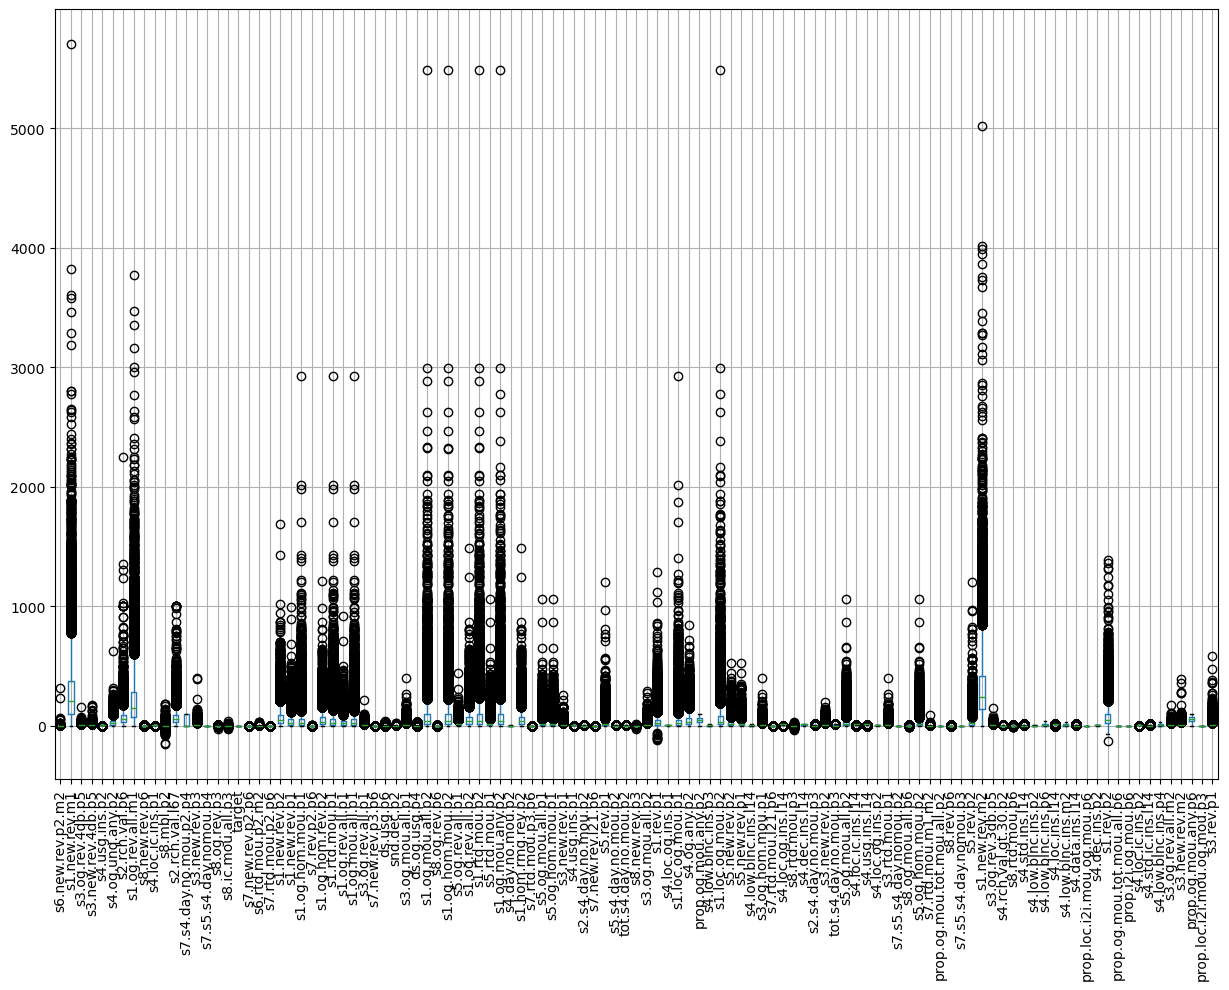

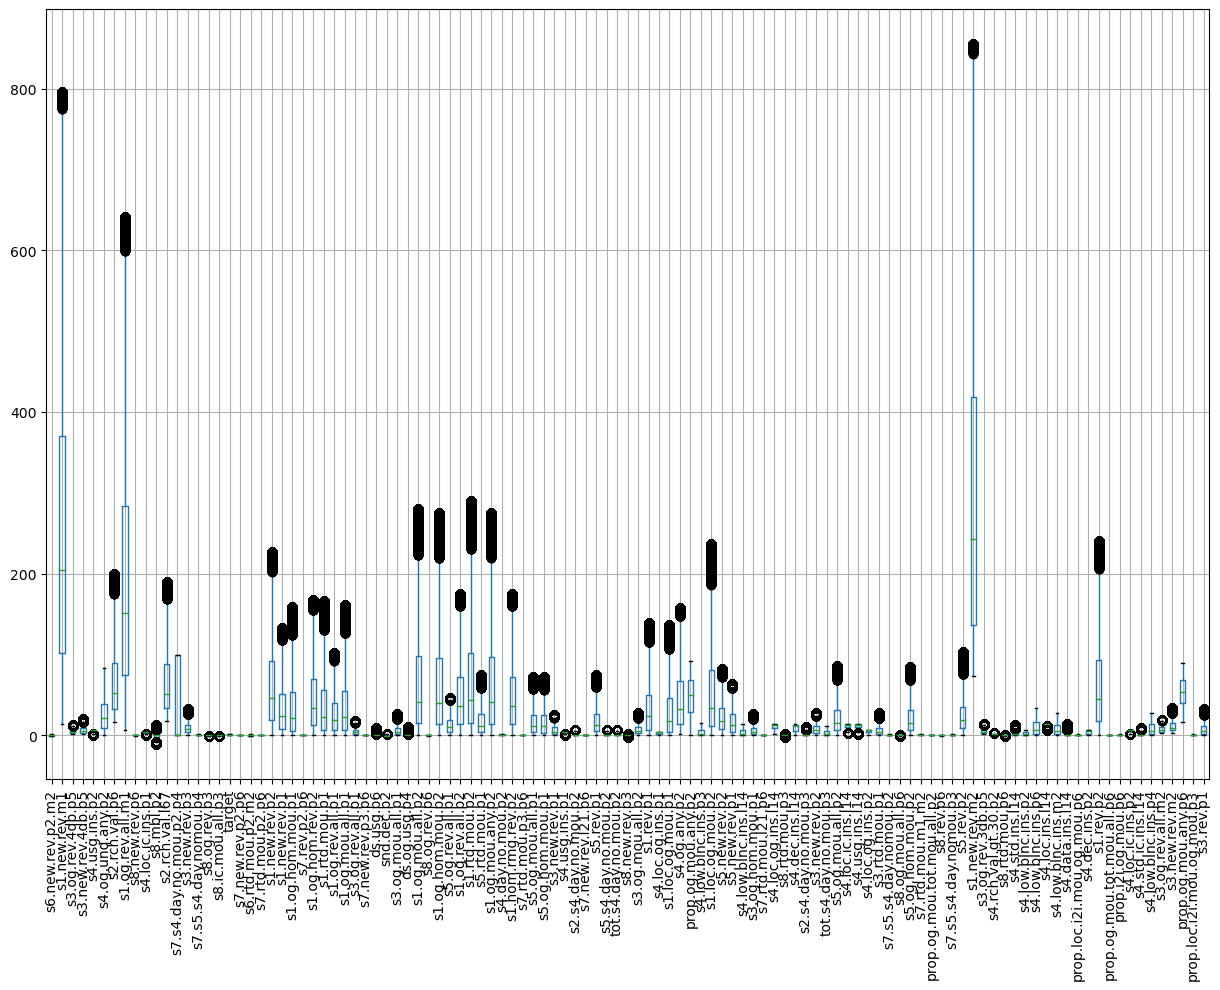

In [17]:
# Using boxplot to visualize outliers
plt.figure(figsize=(15, 10))
churn_data.boxplot()
plt.xticks(rotation=90)
plt.show()

# Capping and flooring the outliers
def cap_floor(series):
    lower_bound = series.quantile(0.05)
    upper_bound = series.quantile(0.95)
    return series.clip(lower_bound, upper_bound)

for column in numerical_cols:
    churn_data[column] = cap_floor(churn_data[column])

# Visualize the data after outlier treatment
plt.figure(figsize=(15, 10))
churn_data.boxplot()
plt.xticks(rotation=90)
plt.show()


Comment : Outliers can significantly affect the performance of machine learning models. They can distort the data distribution, lead to overfitting, and negatively impact the model’s ability to generalize to new data. Therefore, identifying and treating outliers is a crucial step in data preprocessing.

The purpose of capping and flooring outliers is to limit the effect of extreme values on the data analysis and machine learning models. This helps in maintaining the integrity of the data while reducing the noise caused by outliers.

#### 3-Sigma Approach

In [18]:
# 3-Sigma approach for outlier treatment
def three_sigma(series):
    mean = series.mean()
    std = series.std()
    lower_bound = mean - 3 * std
    upper_bound = mean + 3 * std
    return series.clip(lower_bound, upper_bound)

for column in numerical_cols:
    churn_data[column] = three_sigma(churn_data[column])

Comment : The 3-sigma approach is a statistical method used to identify and handle outliers by capping values beyond three standard deviations from the mean, thus reducing their impact on data analysis and modeling.

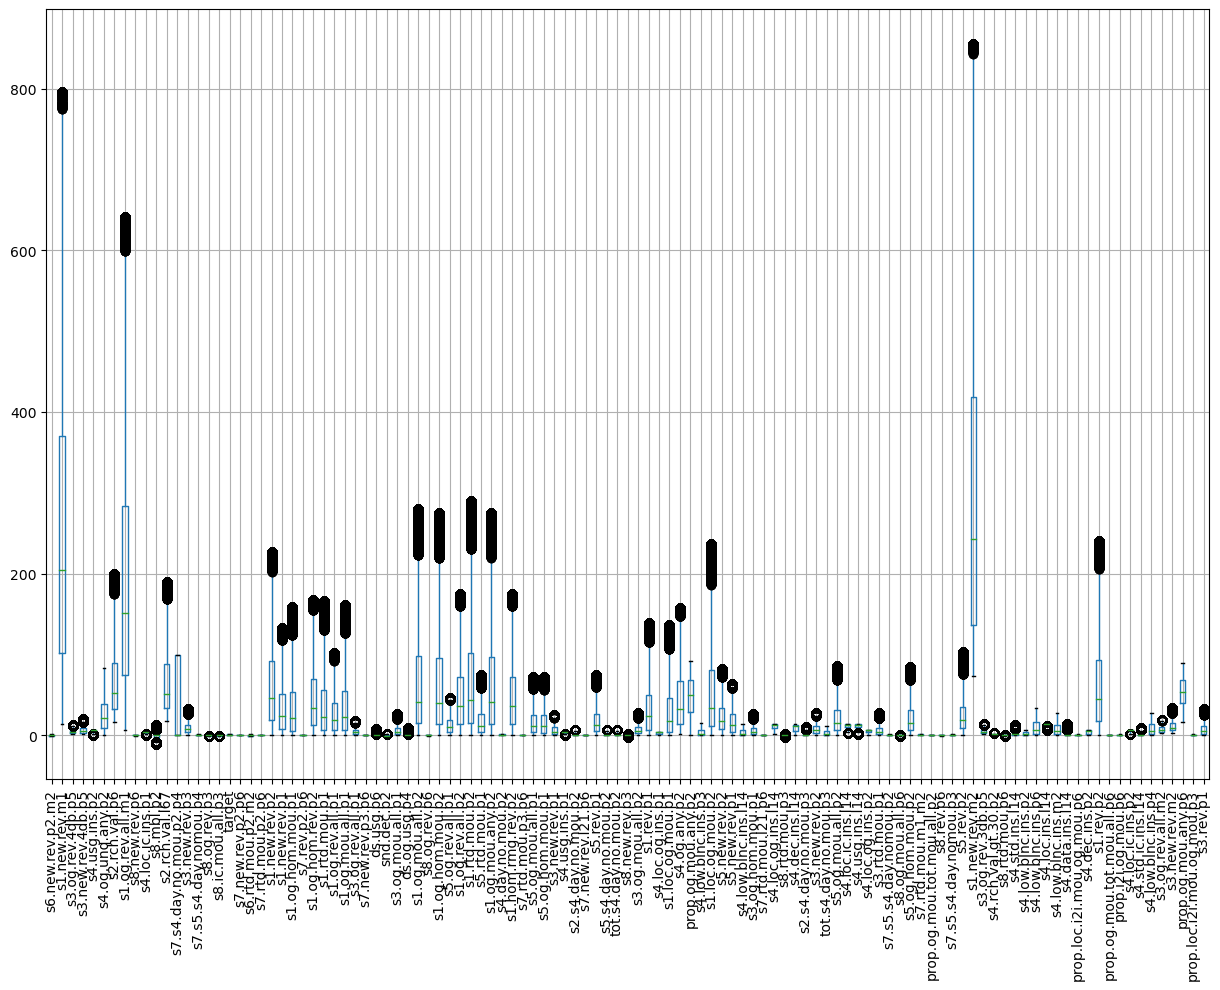

In [19]:
# Visualize the data after 3-sigma outlier treatment
plt.figure(figsize=(15, 10))
churn_data.boxplot()
plt.xticks(rotation=90)
plt.show()


In [20]:
# Scaling numerical features
scaler = StandardScaler()
churn_data[numerical_cols] = scaler.fit_transform(churn_data[numerical_cols])


Comment : The purpose of scaling numerical features is to normalize the range of independent variables or features of data. In most machine learning algorithms, the features need to be on a similar scale to ensure that each feature contributes equally to the result and that the algorithm converges faster.


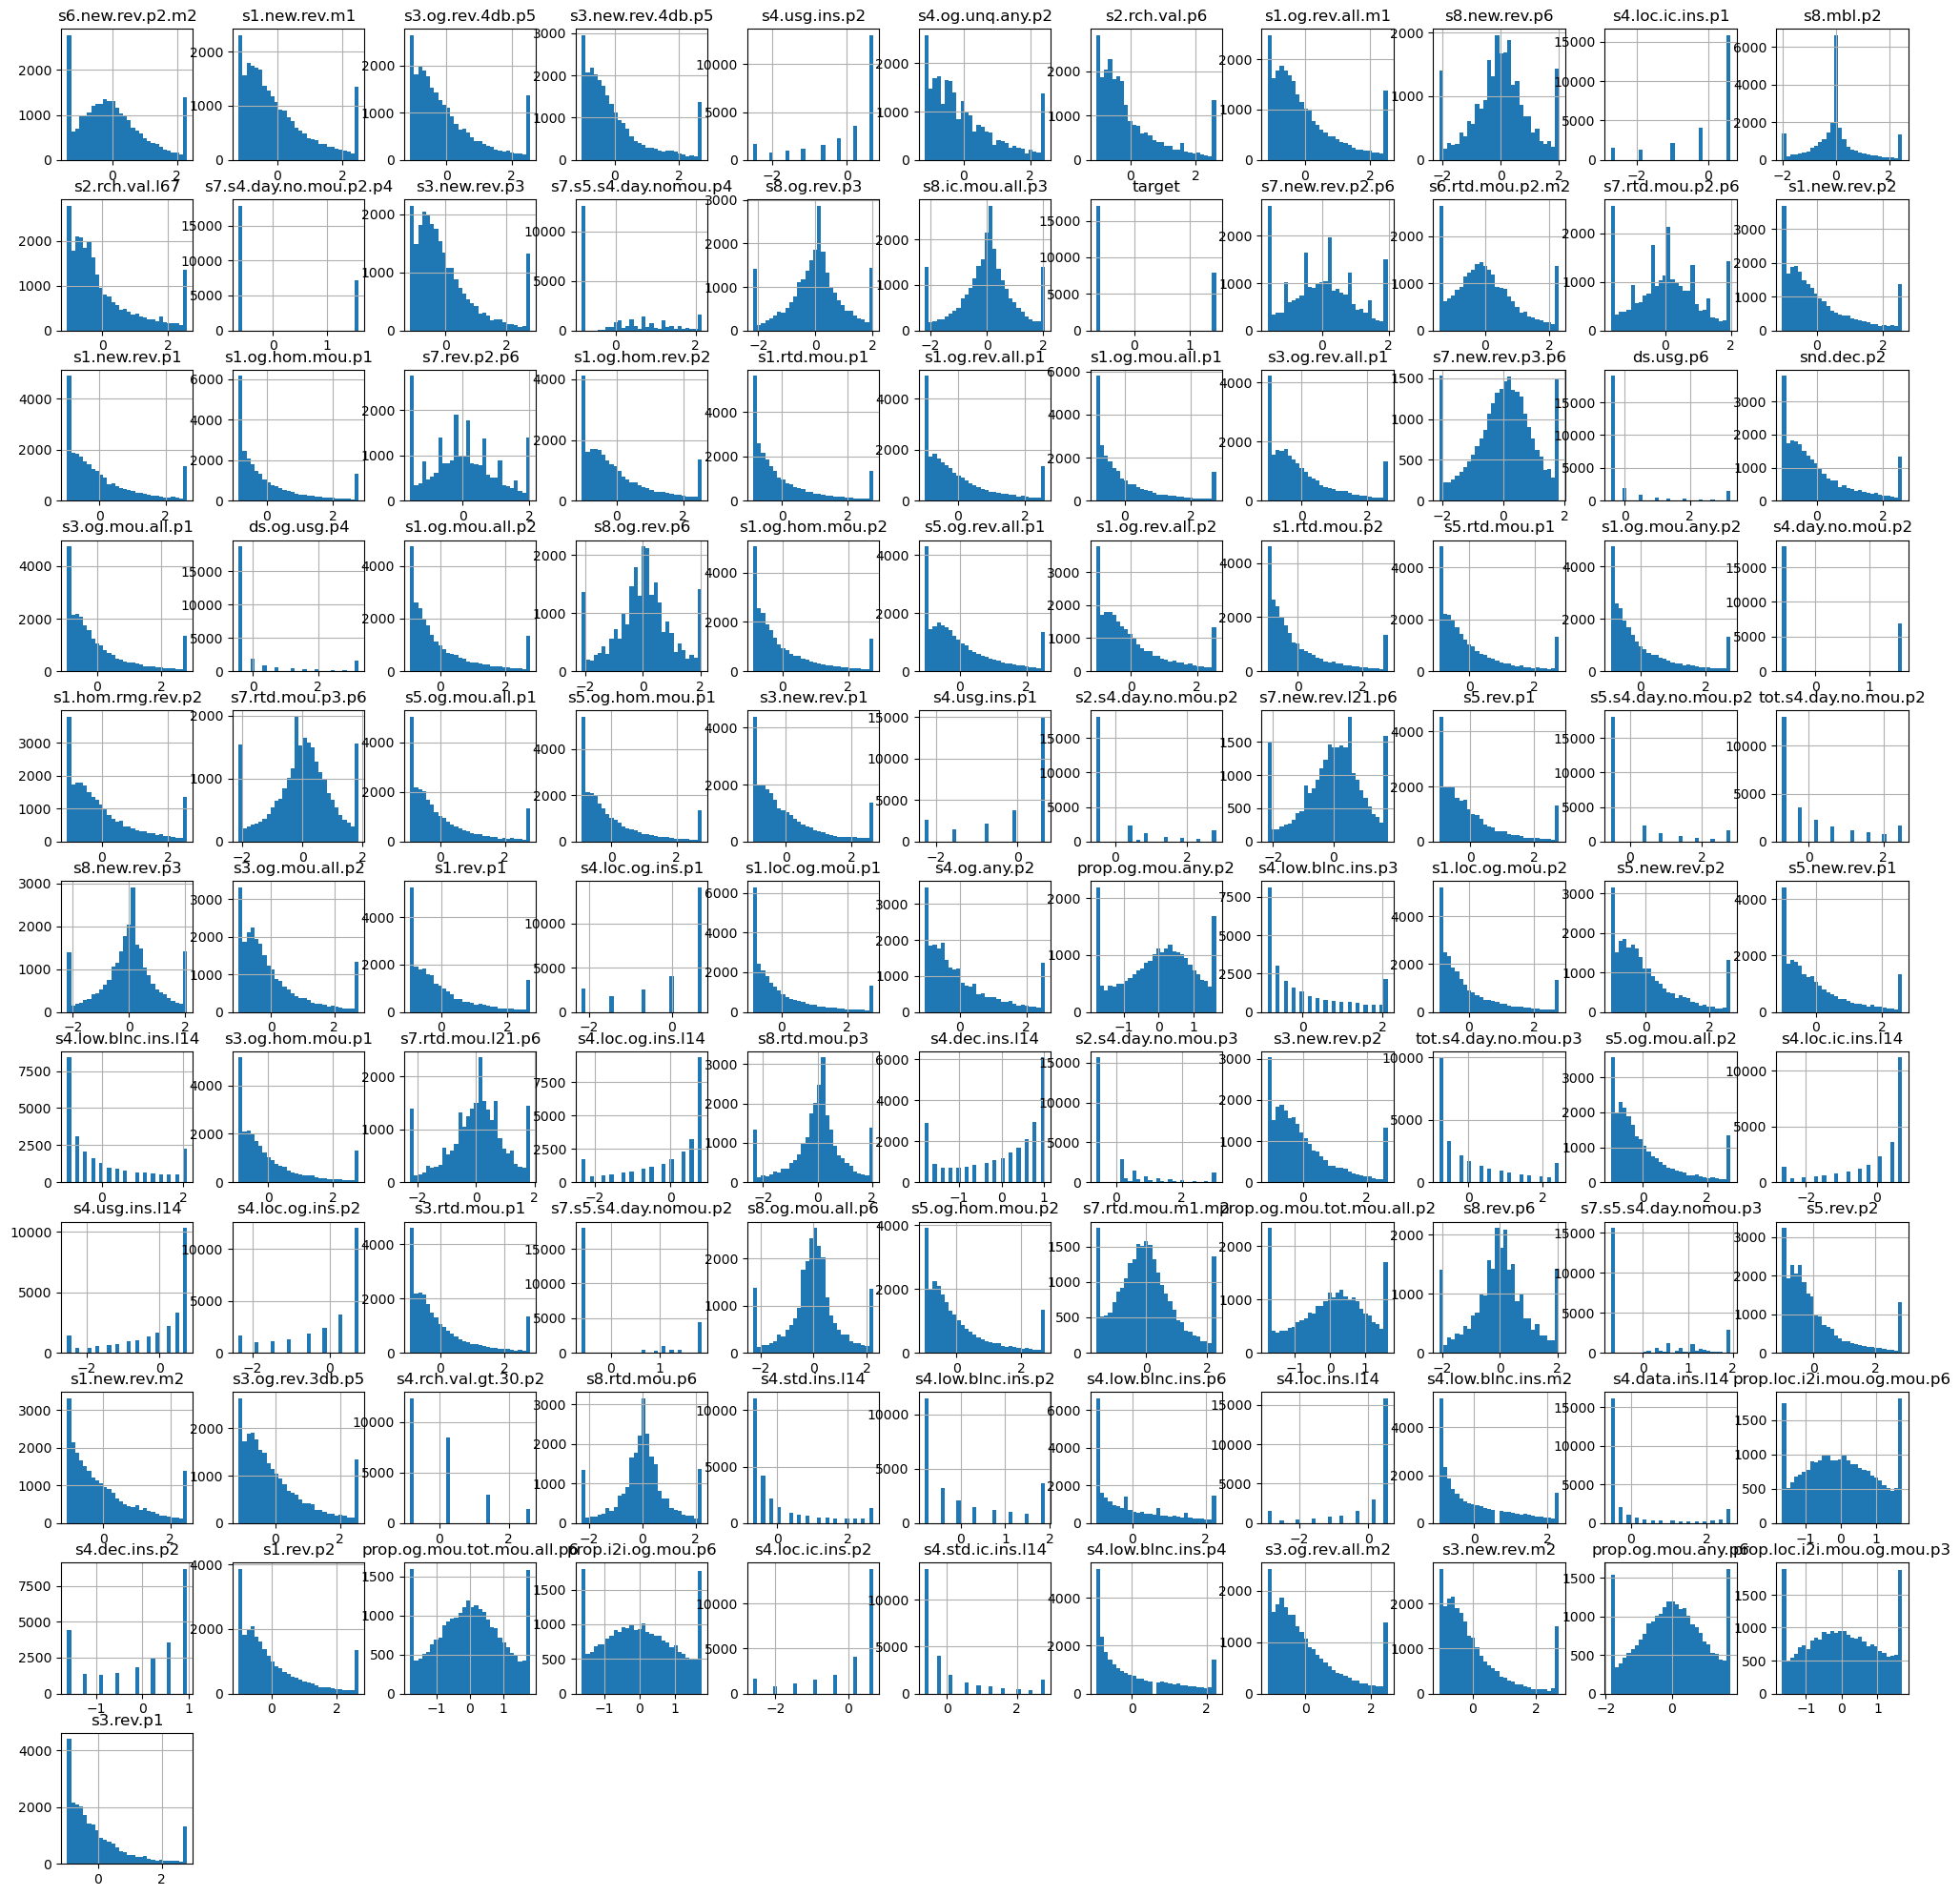

In [21]:
# Distribution of numerical features
churn_data.hist(figsize=(25, 25), bins=30)
plt.show()


Comment : When we run this code, it will produce a grid of histograms, each showing the distribution of a numerical feature in your dataset. This visualization helps you understand the shape, spread, and central tendency of the data for each numerical column.

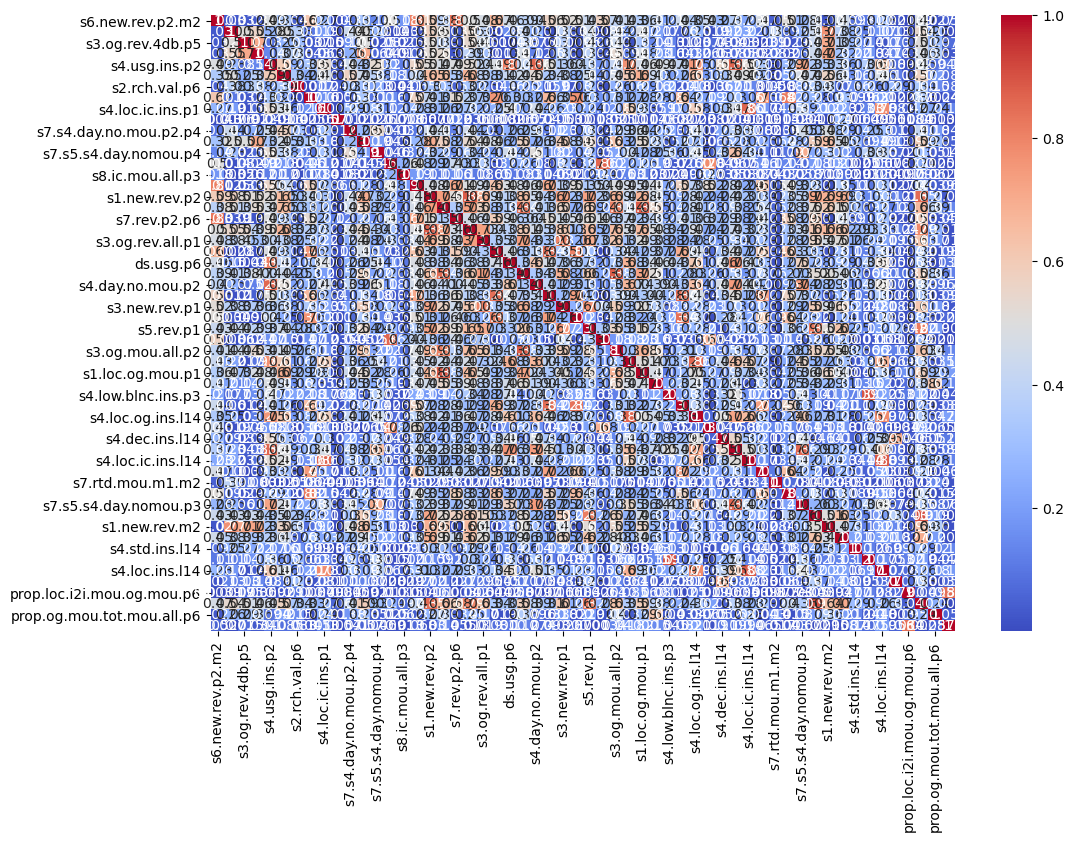

Number of columns after removing highly correlated variables: 57


In [44]:
# Creating a correlation matrix
corr_matrix = churn_data.corr().abs()

# Plot the heatmap of the correlation matrix
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.show()

# Select the upper triangle of the correlation matrix
upper_triangle = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))

# Find features with correlation greater than 0.9
high_corr_vars = [column for column in upper_triangle.columns if any(upper_triangle[column] > 0.9)]

# Drop highly correlated variables
churn_data.drop(columns=high_corr_vars, inplace=True)

# Print the number of columns remaining
print("Number of columns after removing highly correlated variables:", churn_data.shape[1])


Comment : The purpose of removing highly correlated variables is to eliminate redundancy in the dataset. Highly correlated features can provide duplicate information, which can adversely affect the performance and interpretability of machine learning models.


In [23]:
#Printing the final result of our preprocessing
print("Final shape of the data:", churn_data.shape)

Final shape of the data: (25000, 57)


Comment : The final shape of dataset after all preprocessing and EDA is 25000 rows and 57 columns.

## Phase 2 : Model Selection

#### Converting the target variable to discrete classes 

In [24]:
# Convert target variable to discrete classes
churn_data['target'] = pd.cut(churn_data['target'], bins=2, labels=[0, 1])

# Verify target variable classes
print("Target variable classes:", churn_data['target'].unique())

Target variable classes: [1, 0]
Categories (2, int64): [0 < 1]


Comment : These steps are needed to transform the continuous target variable into binary classes for binary classification tasks.

Transforming the continuous target variable into binary classes simplifies the classification problem, making it easier to apply and evaluate binary classification models in the project.

#### Train-Test Split

In [25]:
from sklearn.model_selection import train_test_split

# Define X and y
X = churn_data.drop('target', axis=1)  
y = churn_data['target']  

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


Comment : This step is essential for evaluating the performance of our machine learning model. By splitting the data into training and testing sets, we ensure that our model is trained on one subset of the data and evaluated on another, helping to prevent overfitting and providing a more accurate measure of the model's predictive performance on unseen data.

### Random Forest Classifier

Random Forest is an ensemble learning method that constructs multiple decision trees during training and outputs the mode of their predictions for classification or the mean prediction for regression, improving accuracy and controlling overfitting.

#### Step 1 : Base Model Training and Evaluation 

Random Forest Model Accuracy: 0.81
Random Forest Model Classification Report:
              precision    recall  f1-score   support

           0       0.83      0.90      0.87      3437
           1       0.74      0.60      0.66      1563

    accuracy                           0.81      5000
   macro avg       0.79      0.75      0.77      5000
weighted avg       0.80      0.81      0.80      5000

Random Forest Model training and evaluation complete.
Random Forest Confusion Matrix:


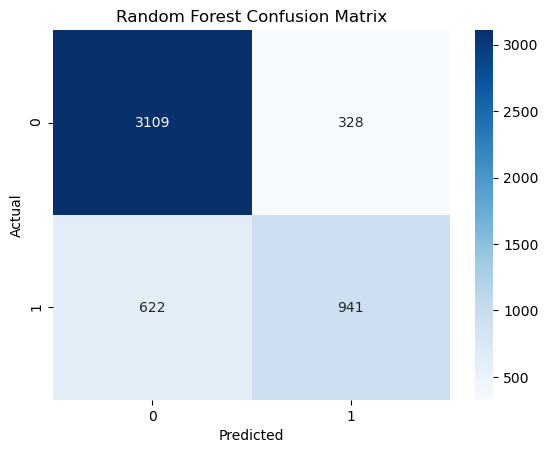

In [26]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Define the Random Forest model
rf_model = RandomForestClassifier(n_estimators=400, random_state=42)

# Train the model
rf_model.fit(X_train, y_train)

# Predict on the test set
y_pred = rf_model.predict(X_test)

# Evaluate the model
rf_accuracy = accuracy_score(y_test, y_pred)
rf_report = classification_report(y_test, y_pred)

print(f"Random Forest Model Accuracy: {rf_accuracy}")
print(f"Random Forest Model Classification Report:\n{rf_report}")

print("Random Forest Model training and evaluation complete.")

# Plot Confusion Matrix for Random Forest
print("Random Forest Confusion Matrix:")
conf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=rf_model.classes_, yticklabels=rf_model.classes_)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Random Forest Confusion Matrix')
plt.show()


Comment : This step involves training a Random Forest model on the training data and evaluating its performance on the test data. The evaluation metrics, such as accuracy and classification report, provide insights into the model's predictive capabilities and help assess its effectiveness in making accurate predictions.

#### Step 2 : Hyperparameter Tuning and Model Training

Fitting 4 folds for each of 100 candidates, totalling 400 fits
Best parameters found: {'n_estimators': 500, 'min_samples_split': 5, 'min_samples_leaf': 4, 'max_features': 'sqrt', 'max_depth': 20, 'bootstrap': True}
Hyperparameter tuning complete.
Best Model Accuracy: 0.81
Best Model Classification Report:
              precision    recall  f1-score   support

           0       0.83      0.90      0.87      3437
           1       0.74      0.60      0.66      1563

    accuracy                           0.81      5000
   macro avg       0.79      0.75      0.77      5000
weighted avg       0.80      0.81      0.80      5000



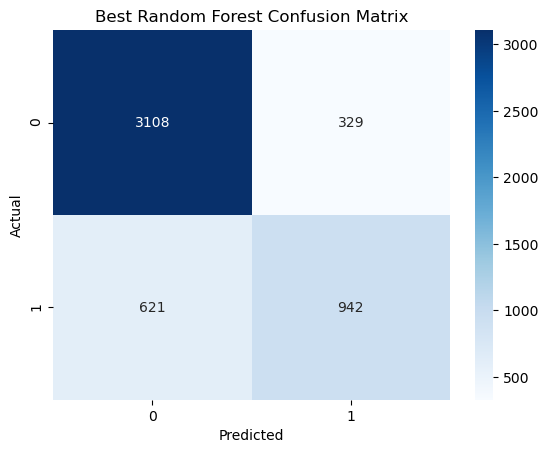

In [27]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV, train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Use a smaller subset of the training data for hyperparameter tuning
X_train_small, _, y_train_small, _ = train_test_split(X_train, y_train, test_size=0.9, random_state=42)

# Define the parameter grid for hyperparameter tuning
param_dist = {
    'n_estimators': [100, 200, 300, 400, 500],
    'max_features': ['sqrt', 'log2', None],
    'max_depth': [None, 10, 20, 30, 40, 50],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'bootstrap': [True, False]
}

# Initialize the Random Forest model
rf = RandomForestClassifier(random_state=42)

# Initialize RandomizedSearchCV
random_search = RandomizedSearchCV(estimator=rf, param_distributions=param_dist,
                                   n_iter=100, cv=4, n_jobs=-1, verbose=2, random_state=42, scoring='accuracy')

# Fit RandomizedSearchCV to the small subset of data
random_search.fit(X_train_small, y_train_small)

# Get the best parameters
best_params = random_search.best_params_

# Print the best parameters
print(f"Best parameters found: {best_params}")
print("Hyperparameter tuning complete.")

# Train the model with the best parameters on the entire training set
best_rf = RandomForestClassifier(**best_params, random_state=42)
best_rf.fit(X_train, y_train)

# Predict on the test set
y_pred_best = best_rf.predict(X_test)

# Evaluate the model
rf_accuracy_best = accuracy_score(y_test, y_pred_best)
rf_report_best = classification_report(y_test, y_pred_best)

print(f"Best Model Accuracy: {rf_accuracy_best}")
print(f"Best Model Classification Report:\n{rf_report_best}")

# Compute confusion matrix
conf_matrix_best = confusion_matrix(y_test, y_pred_best)

# Plot the Confusion Matrix
sns.heatmap(conf_matrix_best, annot=True, fmt="d", cmap="Blues", xticklabels=best_rf.classes_, yticklabels=best_rf.classes_)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Best Random Forest Confusion Matrix")
plt.show()

Comment : Hyperparameter tuning is used to find the optimal combination of parameters for the Random Forest model to improve its performance. This is done using RandomizedSearchCV, which tests different combinations of hyperparameters efficiently. The best parameters are then used to train the model on the entire training set, and the model's performance is evaluated on the test set. This process helps in building a more accurate and reliable model.

### Logistic Regression 

Logistic Regression is a statistical method for binary classification that models the probability of a dependent variable belonging to a particular category using a logistic function.

#### Step 1 : Base Model Training and Evaluation 

Logistic Regression Model Accuracy: 0.8042
Logistic Regression Model Classification Report:
              precision    recall  f1-score   support

           0       0.83      0.90      0.86      3437
           1       0.73      0.60      0.66      1563

    accuracy                           0.80      5000
   macro avg       0.78      0.75      0.76      5000
weighted avg       0.80      0.80      0.80      5000

Logistic Regression Model training and evaluation complete.
Logistic Regression Confusion Matrix:


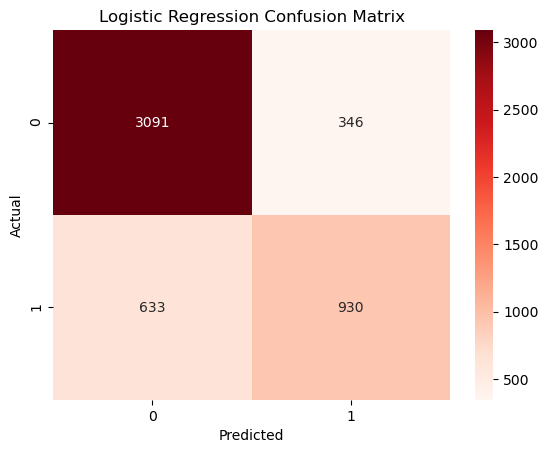

In [28]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# Train the Logistic Regression model
lr_model = LogisticRegression(max_iter=100, random_state=42)
lr_model.fit(X_train, y_train)

# Predict on the test set
lr_y_pred = lr_model.predict(X_test)

# Evaluate the Logistic Regression model
lr_accuracy = accuracy_score(y_test, lr_y_pred)
lr_report = classification_report(y_test, lr_y_pred)

print(f"Logistic Regression Model Accuracy: {lr_accuracy}")
print(f"Logistic Regression Model Classification Report:\n{lr_report}")

print("Logistic Regression Model training and evaluation complete.")

# Plot Confusion Matrix for Logistic Regression
print("Logistic Regression Confusion Matrix:")
lr_conf_matrix = confusion_matrix(y_test, lr_y_pred)
sns.heatmap(lr_conf_matrix, annot=True, fmt='d', cmap='Reds')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Logistic Regression Confusion Matrix')
plt.show()

Comment: This step involves training a Logistic Regression model on the training data and evaluating its performance on the test data. The evaluation metrics, such as accuracy, classification report, and confusion matrix, provide insights into the model's predictive capabilities and help assess its effectiveness in making accurate predictions.

#### Step 2 : Hyperparameter Tuning and Model Training

Fitting 5 folds for each of 50 candidates, totalling 250 fits
Best parameters for Logistic Regression: {'solver': 'liblinear', 'penalty': 'l1', 'C': 0.026366508987303583}
Best Logistic Regression Model Accuracy: 0.8052
Best Logistic Regression Model Classification Report:
              precision    recall  f1-score   support

           0       0.83      0.90      0.86      3437
           1       0.73      0.60      0.66      1563

    accuracy                           0.81      5000
   macro avg       0.78      0.75      0.76      5000
weighted avg       0.80      0.81      0.80      5000

Logistic Regression Model training and evaluation complete.
Logistic Regression Confusion Matrix:


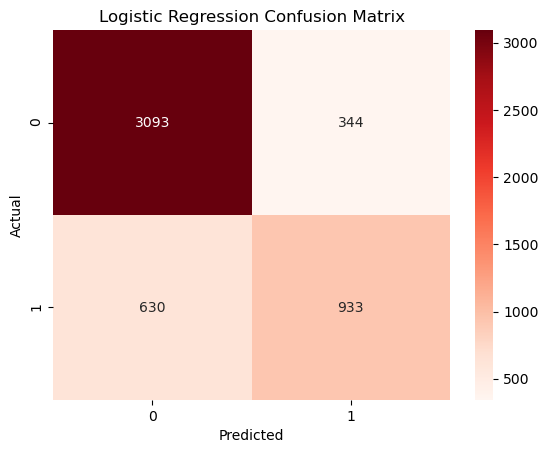

In [29]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.linear_model import LogisticRegression
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Define the parameter distribution for Logistic Regression
param_dist_lr = {
    'penalty': ['l1', 'l2'],
    'C': np.logspace(-2, 2, 20),
    'solver': ['liblinear', 'saga'],
}

# Initialize and fit RandomizedSearchCV for Logistic Regression
random_search_lr = RandomizedSearchCV(
    LogisticRegression(max_iter=2000, random_state=42),
    param_distributions=param_dist_lr,
    n_iter=50,
    cv=5,
    n_jobs=-1,
    random_state=42,
    verbose=1
)
random_search_lr.fit(X_train, y_train)

# Best parameters for Logistic Regression
best_params_lr = random_search_lr.best_params_
print(f"Best parameters for Logistic Regression: {best_params_lr}")

# Train the model with the best parameters on the entire training set
best_lr_model = LogisticRegression(**best_params_lr, max_iter=1000, random_state=42)
best_lr_model.fit(X_train, y_train)

# Predict on the test set
lr_y_pred_best = best_lr_model.predict(X_test)

# Evaluate the model
lr_accuracy_best = accuracy_score(y_test, lr_y_pred_best)
lr_report_best = classification_report(y_test, lr_y_pred_best)

print(f"Best Logistic Regression Model Accuracy: {lr_accuracy_best}")
print(f"Best Logistic Regression Model Classification Report:\n{lr_report_best}")

print("Logistic Regression Model training and evaluation complete.")

# Plot Confusion Matrix for Logistic Regression
print("Logistic Regression Confusion Matrix:")
lr_conf_matrix_best = confusion_matrix(y_test, lr_y_pred_best)
sns.heatmap(lr_conf_matrix_best, annot=True, fmt='d', cmap='Reds')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Logistic Regression Confusion Matrix')
plt.show()

Comment: This step involves tuning the hyperparameters of a Logistic Regression model using RandomizedSearchCV, training the model with the best parameters on the training data, and evaluating its performance on the test data. The evaluation metrics, such as accuracy, classification report, and confusion matrix, provide insights into the model's predictive capabilities and help assess its effectiveness in making accurate predictions.

### Decision Tree

A Decision Tree is a supervised learning algorithm that splits data into subsets based on feature values, forming a tree-like model of decisions to make predictions.

#### Step 1 : Base Model Training and Evaluation 

Decision Tree Model Accuracy: 0.7252
Decision Tree Model Classification Report:
              precision    recall  f1-score   support

           0       0.81      0.78      0.80      3437
           1       0.56      0.59      0.57      1563

    accuracy                           0.73      5000
   macro avg       0.68      0.69      0.69      5000
weighted avg       0.73      0.73      0.73      5000

Decision Tree Model training and evaluation complete.
Decision Tree Confusion Matrix:


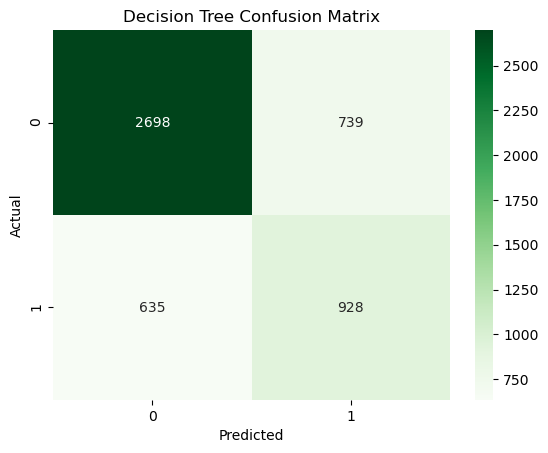

In [30]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# Train the Decision Tree model
dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train, y_train)

# Predict on the test set
dt_y_pred = dt_model.predict(X_test)

# Evaluate the Decision Tree model
dt_accuracy = accuracy_score(y_test, dt_y_pred)
dt_report = classification_report(y_test, dt_y_pred)

print(f"Decision Tree Model Accuracy: {dt_accuracy}")
print(f"Decision Tree Model Classification Report:\n{dt_report}")

print("Decision Tree Model training and evaluation complete.")

# Plot Confusion Matrix for Decision Tree
print("Decision Tree Confusion Matrix:")
dt_conf_matrix = confusion_matrix(y_test, dt_y_pred)
sns.heatmap(dt_conf_matrix, annot=True, fmt='d', cmap='Greens')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Decision Tree Confusion Matrix')
plt.show()

Comment: This step involves training a Decision Tree model on the training data and evaluating its performance on the test data. The evaluation metrics, such as accuracy, classification report, and confusion matrix, provide insights into the model's predictive capabilities and help assess its effectiveness in making accurate predictions.

#### Step 2 : Hyperparameter Tuning and Model Training

Fitting 5 folds for each of 50 candidates, totalling 250 fits
Best parameters for Decision Tree: {'criterion': 'entropy', 'max_depth': 10, 'min_samples_leaf': 2, 'min_samples_split': 10}
Best Decision Tree Model Accuracy: 0.77
Best Decision Tree Model Classification Report:
              precision    recall  f1-score   support

           0       0.82      0.86      0.84      3437
           1       0.65      0.58      0.61      1563

    accuracy                           0.77      5000
   macro avg       0.73      0.72      0.72      5000
weighted avg       0.76      0.77      0.77      5000

Decision Tree Model training and evaluation complete.
Decision Tree Confusion Matrix:


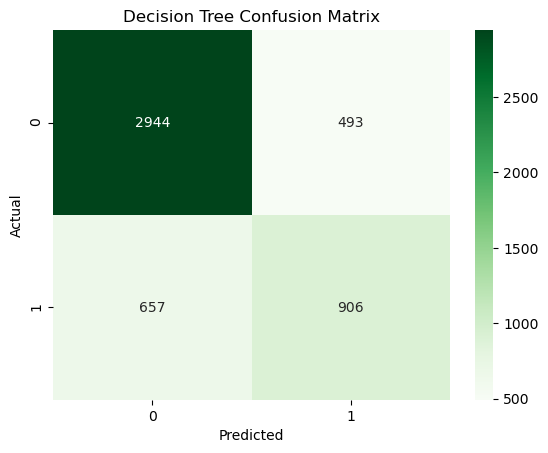

In [31]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from scipy.stats import randint

# Define the parameter distribution for Decision Tree
param_dist_dt = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [None] + list(np.arange(10, 51, 10)),
    'min_samples_split': randint(2, 11),
    'min_samples_leaf': randint(1, 5),
}

# Initialize and fit RandomizedSearchCV for Decision Tree
random_search_dt = RandomizedSearchCV(DecisionTreeClassifier(random_state=42), param_distributions=param_dist_dt, n_iter=50, cv=5, n_jobs=-1, random_state=42, verbose=1)
random_search_dt.fit(X_train, y_train)

# Best parameters for Decision Tree
best_params_dt = random_search_dt.best_params_
print(f"Best parameters for Decision Tree: {best_params_dt}")

# Train the model with the best parameters on the entire training set
best_dt_model = DecisionTreeClassifier(**best_params_dt, random_state=42)
best_dt_model.fit(X_train, y_train)

# Predict on the test set
dt_y_pred_best = best_dt_model.predict(X_test)

# Evaluate the model
dt_accuracy_best = accuracy_score(y_test, dt_y_pred_best)
dt_report_best = classification_report(y_test, dt_y_pred_best)

print(f"Best Decision Tree Model Accuracy: {dt_accuracy_best}")
print(f"Best Decision Tree Model Classification Report:\n{dt_report_best}")

print("Decision Tree Model training and evaluation complete.")

# Plot Confusion Matrix for Decision Tree
print("Decision Tree Confusion Matrix:")
dt_conf_matrix_best = confusion_matrix(y_test, dt_y_pred_best)
sns.heatmap(dt_conf_matrix_best, annot=True, fmt='d', cmap='Greens')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Decision Tree Confusion Matrix')
plt.show()

Comment: This step involves tuning the hyperparameters of a Decision Tree model using RandomizedSearchCV, training the model with the best parameters on the training data, and evaluating its performance on the test data. The evaluation metrics, such as accuracy, classification report, and confusion matrix, provide insights into the model's predictive capabilities and help assess its effectiveness in making accurate predictions.

### Result

In [38]:
import pandas as pd
from tabulate import tabulate

# Define the accuracy results for each model
data = {
    'Model': ['Random Forest', 'Logistic Regression', 'Decision Tree'],
    'Normal Model Accuracy': [rf_accuracy, lr_accuracy, dt_accuracy],
    'Hypertuned Model Accuracy': [rf_accuracy_best, lr_accuracy_best, dt_accuracy_best]
}

# Create a DataFrame
results_df = pd.DataFrame(data)

# Display the DataFrame
print(tabulate(results_df, headers='keys', tablefmt='pretty'))

+---+---------------------+-----------------------+---------------------------+
|   |        Model        | Normal Model Accuracy | Hypertuned Model Accuracy |
+---+---------------------+-----------------------+---------------------------+
| 0 |    Random Forest    |         0.81          |           0.81            |
| 1 | Logistic Regression |        0.8042         |          0.8052           |
| 2 |    Decision Tree    |        0.7252         |           0.77            |
+---+---------------------+-----------------------+---------------------------+


## Phase 3 : Model Evaluation

### Step 1 : Plotting RoC and AuC Graph

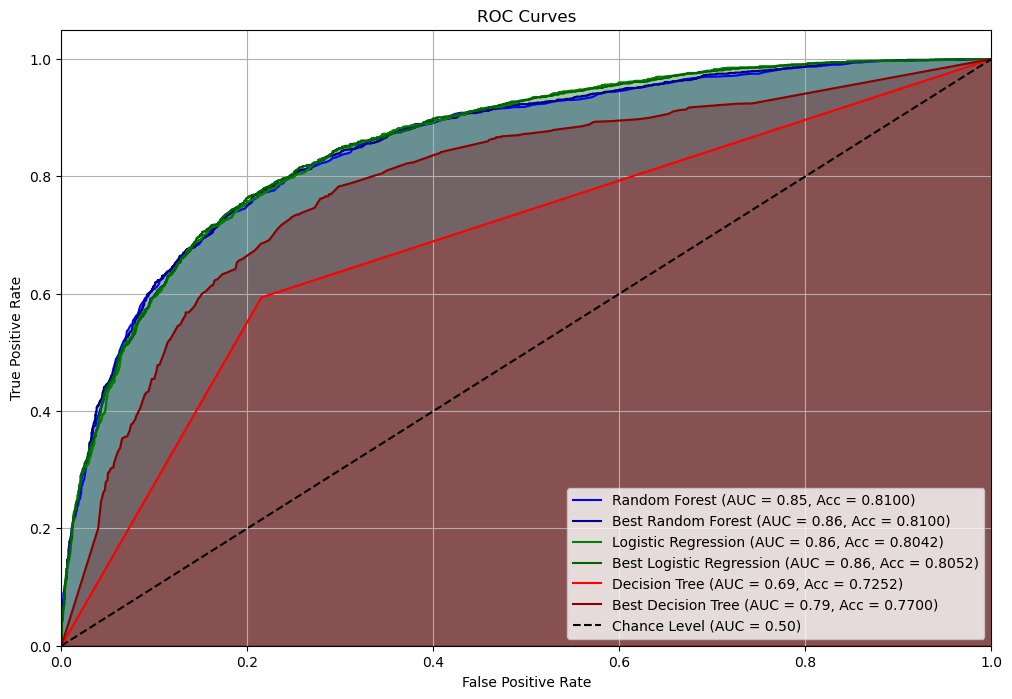

In [39]:
from sklearn.metrics import roc_curve, auc, accuracy_score
import matplotlib.pyplot as plt

# Function to calculate ROC curve and AUC
def calculate_roc_auc(model, X_test, y_test):
    probs = model.predict_proba(X_test)[:, 1]
    fpr, tpr, _ = roc_curve(y_test, probs)
    roc_auc = auc(fpr, tpr)
    accuracy = accuracy_score(y_test, model.predict(X_test))
    return fpr, tpr, roc_auc, accuracy

# Calculate ROC curve, AUC, and accuracy for each model
rf_fpr, rf_tpr, rf_auc, rf_acc = calculate_roc_auc(rf_model, X_test, y_test)
rf_fpr_best, rf_tpr_best, rf_auc_best, rf_acc_best = calculate_roc_auc(best_rf, X_test, y_test)

lr_fpr, lr_tpr, lr_auc, lr_acc = calculate_roc_auc(lr_model, X_test, y_test)
lr_fpr_best, lr_tpr_best, lr_auc_best, lr_acc_best = calculate_roc_auc(best_lr_model, X_test, y_test)

dt_fpr, dt_tpr, dt_auc, dt_acc = calculate_roc_auc(dt_model, X_test, y_test)
dt_fpr_best, dt_tpr_best, dt_auc_best, dt_acc_best = calculate_roc_auc(best_dt_model, X_test, y_test)

# Plot the ROC curves and fill the area under the curve
plt.figure(figsize=(12, 8))

# Random Forest
plt.plot(rf_fpr, rf_tpr, color='blue', label=f'Random Forest (AUC = {rf_auc:.2f}, Acc = {rf_acc:.4f})')
plt.fill_between(rf_fpr, rf_tpr, color='blue', alpha=0.2)

# Best Random Forest
plt.plot(rf_fpr_best, rf_tpr_best, color='darkblue', label=f'Best Random Forest (AUC = {rf_auc_best:.2f}, Acc = {rf_acc_best:.4f})')
plt.fill_between(rf_fpr_best, rf_tpr_best, color='darkblue', alpha=0.2)

# Logistic Regression
plt.plot(lr_fpr, lr_tpr, color='green', label=f'Logistic Regression (AUC = {lr_auc:.2f}, Acc = {lr_acc:.4f})')
plt.fill_between(lr_fpr, lr_tpr, color='green', alpha=0.2)

# Best Logistic Regression
plt.plot(lr_fpr_best, lr_tpr_best, color='darkgreen', label=f'Best Logistic Regression (AUC = {lr_auc_best:.2f}, Acc = {lr_acc_best:.4f})')
plt.fill_between(lr_fpr_best, lr_tpr_best, color='darkgreen', alpha=0.2)

# Decision Tree
plt.plot(dt_fpr, dt_tpr, color='red', label=f'Decision Tree (AUC = {dt_auc:.2f}, Acc = {dt_acc:.4f})')
plt.fill_between(dt_fpr, dt_tpr, color='red', alpha=0.2)

# Best Decision Tree
plt.plot(dt_fpr_best, dt_tpr_best, color='darkred', label=f'Best Decision Tree (AUC = {dt_auc_best:.2f}, Acc = {dt_acc_best:.4f})')
plt.fill_between(dt_fpr_best, dt_tpr_best, color='darkred', alpha=0.3)

# Plotting the diagonal line
plt.plot([0, 1], [0, 1], 'k--', label='Chance Level (AUC = 0.50)')

# Formatting plot
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curves')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

Comment:Plotted ROC curves and AUC for different models to compare their performance.
This visualization helps compare the performance of different models in terms of their ability to distinguish between positive and negative classes, providing a clear visual representation of each model's effectiveness.

### Step 2 : Feature Importance Analysis

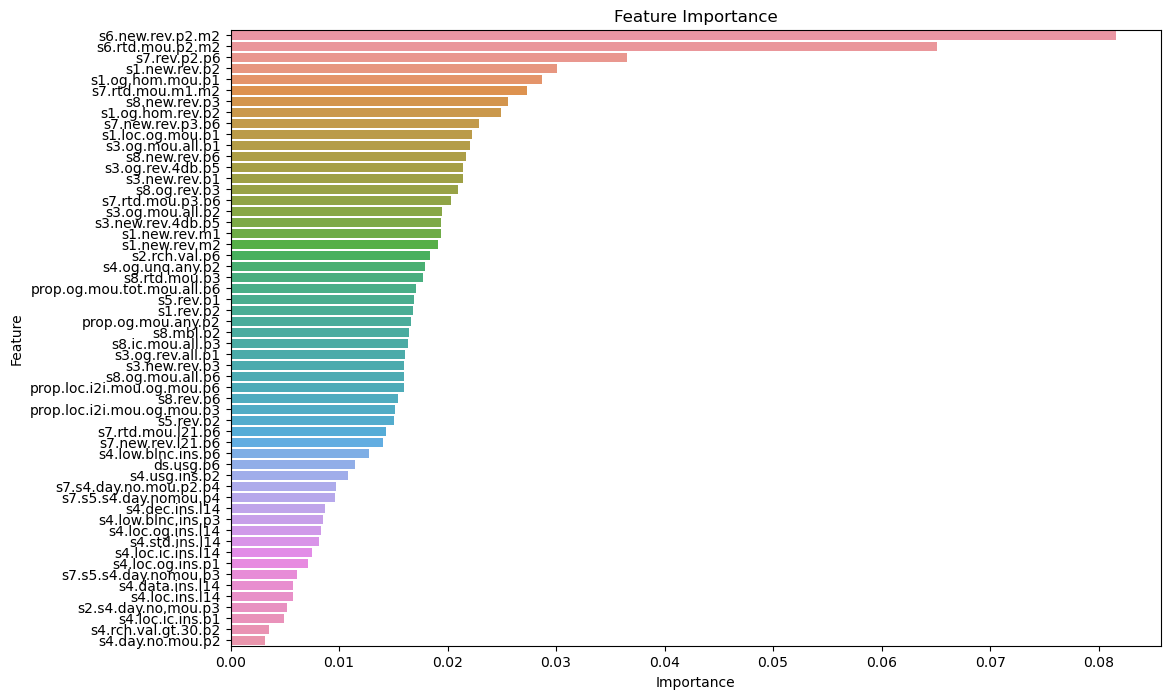

In [40]:
# Get feature importances
importances = rf_model.feature_importances_
feature_names = X_train.columns
feature_importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': importances})
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Plot feature importances
plt.figure(figsize=(12, 8))
sns.barplot(x='Importance', y='Feature', data=feature_importance_df)
plt.title('Feature Importance')
plt.show()


Comment: This code block calculates and plots the feature importances from the Random Forest model.
The feature importances help identify which features have the most influence on the model's predictions.
The plot provides a visual representation, making it easier to interpret the importance of each feature.

### Step 3 : Model Interpretation with SHAP

Comment: The below code block uses SHAP (SHapley Additive exPlanations) to explain the predictions of the Random Forest model.
The SHAP values provide insights into the contribution of each feature for each prediction.
The summary plot shows the overall impact of features, while the dependence plot shows the interaction of a specific feature with the target.
These visualizations help in understanding the model's behavior and feature interactions.

In [41]:
print(X_train.columns)

Index(['s6.new.rev.p2.m2', 's1.new.rev.m1', 's3.og.rev.4db.p5',
       's3.new.rev.4db.p5', 's4.usg.ins.p2', 's4.og.unq.any.p2',
       's2.rch.val.p6', 's8.new.rev.p6', 's4.loc.ic.ins.p1', 's8.mbl.p2',
       's7.s4.day.no.mou.p2.p4', 's3.new.rev.p3', 's7.s5.s4.day.nomou.p4',
       's8.og.rev.p3', 's8.ic.mou.all.p3', 's6.rtd.mou.p2.m2', 's1.new.rev.p2',
       's1.og.hom.mou.p1', 's7.rev.p2.p6', 's1.og.hom.rev.p2',
       's3.og.rev.all.p1', 's7.new.rev.p3.p6', 'ds.usg.p6', 's3.og.mou.all.p1',
       's4.day.no.mou.p2', 's7.rtd.mou.p3.p6', 's3.new.rev.p1',
       's7.new.rev.l21.p6', 's5.rev.p1', 's8.new.rev.p3', 's3.og.mou.all.p2',
       's4.loc.og.ins.p1', 's1.loc.og.mou.p1', 'prop.og.mou.any.p2',
       's4.low.blnc.ins.p3', 's7.rtd.mou.l21.p6', 's4.loc.og.ins.l14',
       's8.rtd.mou.p3', 's4.dec.ins.l14', 's2.s4.day.no.mou.p3',
       's4.loc.ic.ins.l14', 's8.og.mou.all.p6', 's7.rtd.mou.m1.m2',
       's8.rev.p6', 's7.s5.s4.day.nomou.p3', 's5.rev.p2', 's1.new.rev.m2',
       's

100%|===================| 1998/2000 [11:07<00:00]        

SHAP values shape: (1000, 56, 2)
Sampled data shape: (1000, 56)


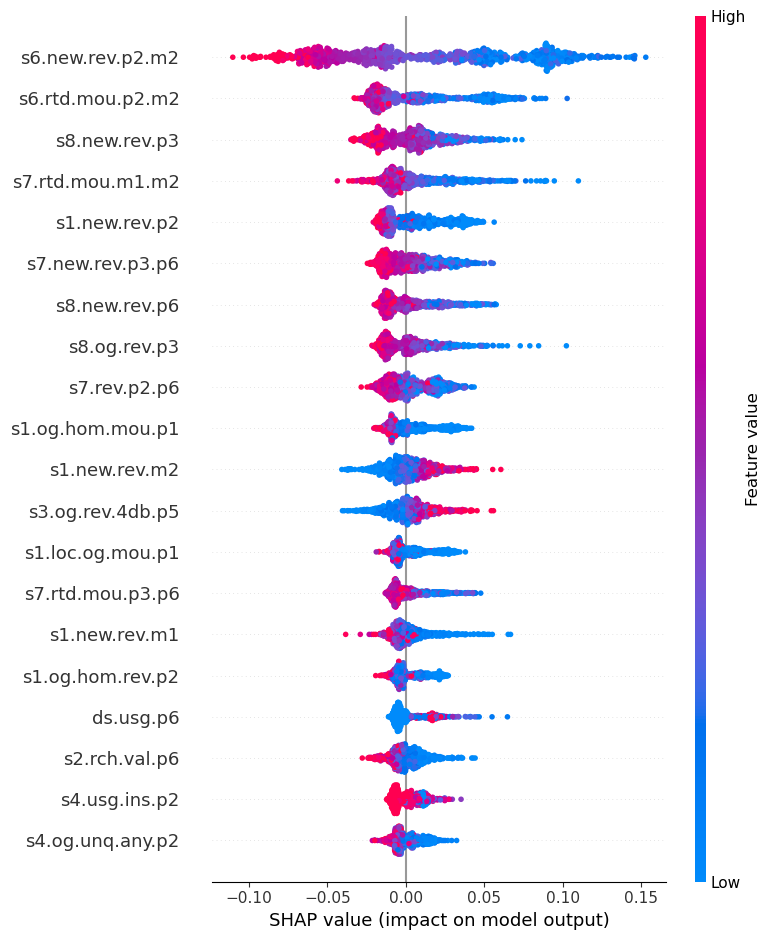

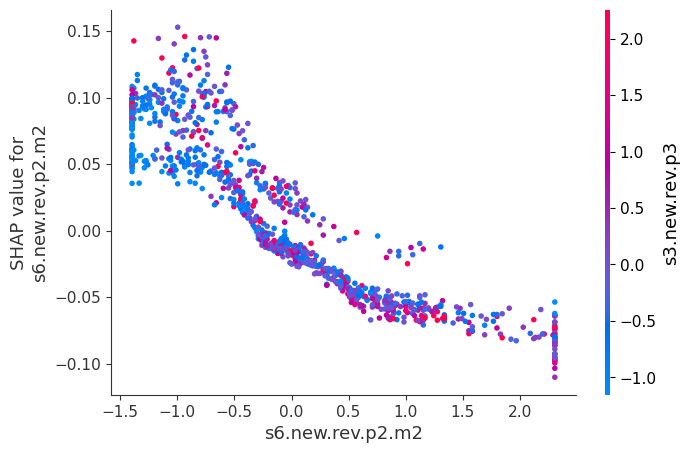

In [42]:
import shap

# Initialize the explainer with the tree algorithm
explainer = shap.Explainer(rf_model, X_train, algorithm="tree")

# Sample a subset of the data to reduce computation time
subset_size = 1000  # Adjust the size as needed
sampled_data = X_train.sample(subset_size, random_state=42)

# Compute SHAP values for the sampled data
shap_values = explainer(sampled_data, check_additivity=False)

# Check the structure of shap_values
print("SHAP values shape:", shap_values.shape)
print("Sampled data shape:", sampled_data.shape)

# Select SHAP values for the positive class (class index 1)
shap_values_class1 = shap_values.values[..., 1]

# Ensure that the shape of SHAP values matches the sampled data
if shap_values_class1.shape[0] == sampled_data.shape[0] and shap_values_class1.shape[1] == sampled_data.shape[1]:
    # Summary plot
    shap.summary_plot(shap_values_class1, sampled_data)

    # Select a specific feature for the dependence plot
    feature_name = 's6.new.rev.p2.m2'  # Specific feature name

    # Dependence plot for a specific feature
    shap.dependence_plot(feature_name, shap_values_class1, sampled_data, feature_names=sampled_data.columns)
else:
    print("Mismatch in shapes of SHAP values and sampled data.")


### Step 4 : Model Interpretation with LIME

Comment: This code block uses LIME (Local Interpretable Model-agnostic Explanations) to explain the prediction for a single instance.
LIME provides local explanations by approximating the model locally around the instance being explained.
The explanation highlights the contribution of the top features for the specific prediction, making it easier to understand why the model made that prediction.
The visualization in the notebook provides an intuitive understanding of the feature contributions.

In [43]:
import lime
import lime.lime_tabular
import pandas as pd

# Initialize the explainer
lime_explainer = lime.lime_tabular.LimeTabularExplainer(
    training_data=X_train.values,
    feature_names=X_train.columns.tolist(),
    class_names=['Not Churn', 'Churn'],
    mode='classification'
)

# Function to make predictions with the correct feature names
def predict_proba_with_names(x):
    return rf_model.predict_proba(pd.DataFrame(x, columns=X_train.columns))

# Explain a single instance
i = 1  # Index of the instance to explain
exp = lime_explainer.explain_instance(X_test.iloc[i].values, predict_proba_with_names, num_features=10)

# Show the explanation
exp.show_in_notebook(show_table=True)


This LIME output shows that the model predicts a 56% probability of customer churn, primarily driven by negative values of features like `s8.new.rev.p6` and `s7.new.rev.p3.p6`.